In [1]:
### Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
### 1.  Loading data into Pandas
## Import raw data from GitHub
url = 'https://raw.githubusercontent.com/danehamlett/UC_Davis/master/Price_vs_Sales.csv'
df = pd.read_csv(url)

## View raw data
print(df)

    Price  Sales
0    0.50    181
1    1.35     33
2    0.79     91
3    1.71     13
4    1.38     34
5    1.22     47
6    1.03     73
7    1.84     11
8    1.73     15
9    1.62     20
10   0.76     91
11   1.79     13
12   1.57     22
13   1.27     34
14   0.96     74
15   0.52    164
16   0.64    129
17   1.05     55
18   0.72    107
19   0.75    119


In [4]:
### 2.  Writing an apply function that transforms a column
## Transform Sales column for linear regression modeling
## Alternative Method: df['Log_Sales'] = np.log10(df['Sales'])
df['Log_Sales'] = df.apply(lambda row: np.log10(row.Sales), axis=1)

## View data
print(df)

    Price  Sales  Log_Sales
0    0.50    181   2.257679
1    1.35     33   1.518514
2    0.79     91   1.959041
3    1.71     13   1.113943
4    1.38     34   1.531479
5    1.22     47   1.672098
6    1.03     73   1.863323
7    1.84     11   1.041393
8    1.73     15   1.176091
9    1.62     20   1.301030
10   0.76     91   1.959041
11   1.79     13   1.113943
12   1.57     22   1.342423
13   1.27     34   1.531479
14   0.96     74   1.869232
15   0.52    164   2.214844
16   0.64    129   2.110590
17   1.05     55   1.740363
18   0.72    107   2.029384
19   0.75    119   2.075547


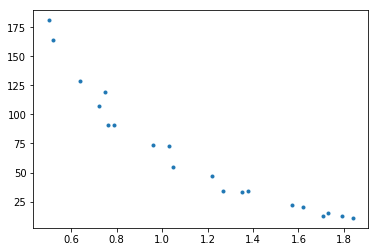

In [5]:
### 3.  A basic Data Visualization using Seaborn or Plotly library or Matplotlib
### Using matplotlib, show a basic visualization (scatter plot)

## X and Y values
x = df['Price']
y = df['Sales']

## Render the chart
plt.plot(x, y, '.')
plt.show()

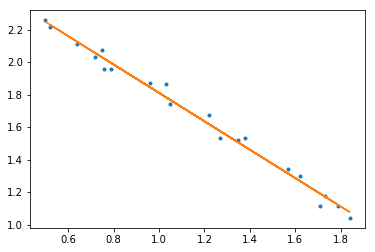

In [6]:
### 4.  Some type of Machine Learning technique on the data - Linear Regression
## X and Transformed Y values
x = df['Price']
y_log = df['Log_Sales']

## Render the chart
plt.plot(x, y_log, '.')

## Create a scatter plot with a linear regression trend line
m, b = np.polyfit(x, y_log, 1)
plt.plot(x, m*x + b, '-')
plt.show()

In [7]:
## Run a regression model
x = sm.add_constant(x, prepend=True)
results = smf.OLS(y_log,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Sales   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1604.
Date:                Thu, 28 Dec 2017   Prob (F-statistic):           4.75e-19
Time:                        23:57:05   Log-Likelihood:                 35.802
No. Observations:                  20   AIC:                            -67.60
Df Residuals:                      18   BIC:                            -65.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6846      0.027     99.293      0.0